In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Linear(W, X, b):
    return W @ X + b

In [3]:
def ReLU(Z):
    return np.maximum(0, Z)

In [4]:
def Sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

In [5]:
def BCE(y, y_hat, eps = 1e-8):
    m = y.shape[0]
    # print(m)
    return -1 * np.sum((y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))) / m

---

## Backward Pass

In [6]:
def BCE_derivative(y, y_hat):
    m = y.shape[0]
    return (y_hat - y) / m

def ReLU_derivative(Z):
    return Z > 0

def Sigmoid_derivative(Z):
    return Sigmoid(Z) * (1 - Sigmoid(Z))

In [7]:
def output_grad(loss_grad, acivation_grad):
    return loss_grad * acivation_grad

def out_grad(W, grad, acivation_grad):
    return (W.T @ grad) * acivation_grad

In [8]:
def dW(grad, acivation_grad):
    m = acivation_grad.shape[1]
    return (grad @ acivation_grad.T) / m

def db(grad):
    m = grad.shape[1]
    return np.sum(grad, axis = 1, keepdims=True) / m

def dA(W, grad):
    return W.T @ grad

In [9]:
X = np.array([[0, 1, 0, 1], [0, 0, 1, 1]])
y = np.array([[0, 1, 1, 0]])  # XOR relation

W1 = np.random.randn(3,2) * np.sqrt(2 / 2)
W2 = np.random.randn(2,3) * np.sqrt(2 / 3)
W3 = np.random.randn(1,2) * np.sqrt(2 / 2)

b1 = np.zeros((3,1))
b2 = np.zeros((2,1))
b3 = np.zeros((1,1))

def train(alpha = 0.01):
    global W1, b1, W2, b2, W3, b3

    Z1 = Linear(W1, X, b1)
    A1 = ReLU(Z1)
    Z2 = Linear(W2, A1, b2)
    A2 = ReLU(Z2)
    Z3 = Linear(W3, A2, b3)
    A3 = Sigmoid(Z3)

    y_hat = A3
    
    L = BCE(y, y_hat)

    # ------------------------------------------
    del3 = y_hat - y

    dW3 = dW(del3, A2)
    db3 = db(del3)

    # -------------------------------------------
    del2 = out_grad(W3, del3, ReLU_derivative(Z2))

    dW2 = dW(del2, A1)
    db2 = db(del2)

    # ---------------------------------------------
    del1 = out_grad(W2, del2, ReLU_derivative(Z1))

    dW1 = dW(del1, X)
    db1 = db(del1)

    # ----------------------------------------------
    
    W1 -= alpha * dW1
    b1 -= alpha * db1

    W2 -= alpha * dW2
    b2 -= alpha * db2

    W3 -= alpha * dW3
    b3 -= alpha * db3

    return (y_hat, L)
    

In [10]:
def predict(X):
    global W1, b1, W2, b2, W3, b3

    Z1 = Linear(W1, X, b1)
    A1 = ReLU(Z1)
    Z2 = Linear(W2, A1, b2)
    A2 = ReLU(Z2)
    Z3 = Linear(W3, A2, b3)
    A3 = Sigmoid(Z3)

    y_hat = A3
    
    L = BCE(y, y_hat)

    return (y_hat, L)

In [11]:
losses = []
prediction = []
epochs = 5000
for epoch in range(epochs):
    predicted, loss = train(0.1)
    if (epoch + 1) % 100 == 0:
        losses.append(loss)
        prediction.append(predicted.copy())

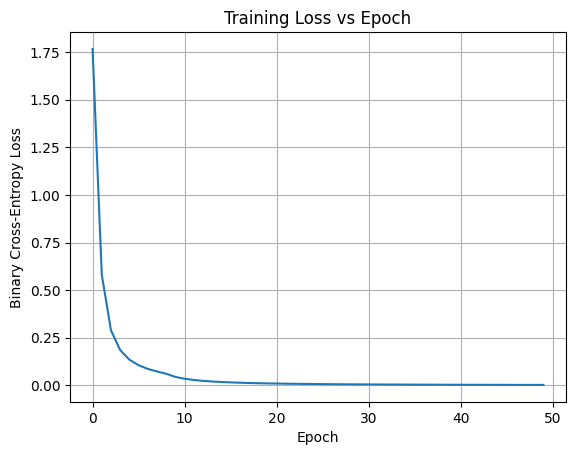

In [12]:
plt.figure()
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss vs Epoch")
plt.grid(True)
plt.show()

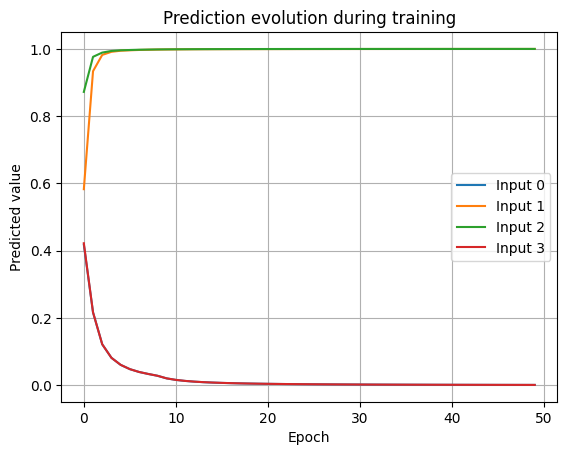

In [13]:
predictions = np.array(prediction)  # shape: (epochs, 1, 4)
predictions = predictions.squeeze()  # → (epochs, 4)

plt.figure()
for i in range(4):
    plt.plot(predictions[:, i], label=f"Input {i}")

plt.xlabel("Epoch")
plt.ylabel("Predicted value")
plt.title("Prediction evolution during training")
plt.legend()
plt.grid(True)
plt.show()


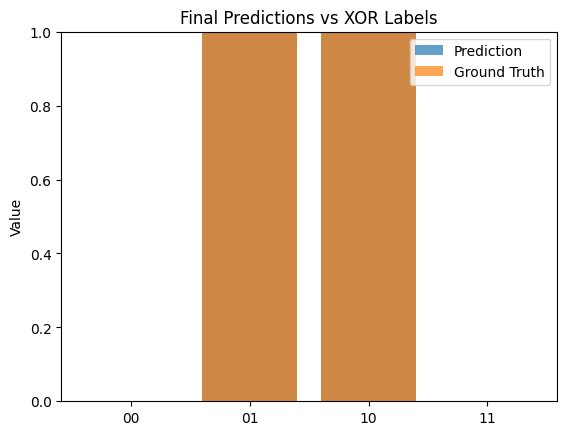

In [14]:
final_pred = predictions[-1]

plt.figure()
plt.bar(range(4), final_pred, alpha=0.7, label="Prediction")
plt.bar(range(4), y.flatten(), alpha=0.7, label="Ground Truth")
plt.xticks(range(4), ["00", "01", "10", "11"])
plt.ylim(0, 1)
plt.ylabel("Value")
plt.title("Final Predictions vs XOR Labels")
plt.legend()
plt.show()

In [ ]:
predicted, loss = predict(X)

predicted = predicted.flatten()
predicted = (predicted > 0.5).astype(int)

print(predicted)

[0 1 1 0]
